In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [115]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/SP GLOBAL 100.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('M').first()  #Monthly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-31,4486.5,85.50,3319.990,94.15,43.58,91.94,32.610,109.6951,51.63,...,27.46,114.85,465.55,9.713,43.408,21.5225,644.0,570.898,49.7697,143.0
1,2011-02-28,4344.0,86.63,3152.273,98.01,45.93,96.22,31.525,124.8172,51.78,...,28.35,115.05,491.00,9.855,44.743,20.8875,674.0,582.008,51.7332,148.7
2,2011-03-31,4294.0,83.60,3290.627,99.86,45.60,102.90,32.455,121.5168,52.72,...,30.25,120.90,490.00,9.700,42.829,21.9250,771.0,594.828,51.4202,143.6
3,2011-04-30,4419.0,83.40,3240.860,113.12,46.35,108.32,33.610,122.0569,52.33,...,30.00,114.15,470.00,11.095,43.307,19.1325,671.0,624.313,53.9386,151.0
4,2011-05-31,4360.0,86.20,3105.990,114.37,45.18,108.18,33.860,122.8970,51.54,...,30.60,110.90,462.55,11.270,44.080,20.5600,658.0,660.635,58.8188,155.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,4864.5,369.25,2832.500,194.86,114.21,160.51,64.520,59.1498,268.62,...,161.96,220.60,392.35,18.652,57.450,114.3000,2212.0,973.600,60.2000,387.2
140,2022-09-30,4607.5,338.20,2678.000,182.44,114.51,155.54,62.000,57.0273,257.64,...,162.57,240.20,441.20,18.698,55.000,106.4900,2052.5,881.600,55.2300,372.2
141,2022-10-31,4940.0,326.70,2795.000,171.23,107.73,151.73,56.650,49.6297,217.17,...,154.88,246.60,442.70,17.856,52.990,85.4000,1941.5,882.400,52.4300,386.2
142,2022-11-30,4735.0,317.50,2766.500,218.50,128.15,182.22,59.640,61.0305,207.88,...,162.24,270.50,486.45,19.350,59.140,93.7700,2019.5,844.000,58.7000,403.8


In [116]:
for name in stock_names:
    print(name)

RIO LN Equity
OR FP Equity
AAL LN Equity
CAT UN Equity
JPM UN Equity
CVX UN Equity
KO UN Equity
GE UN Equity
AMT UN Equity
7267 JT Equity
HPQ UN Equity
BBVA SQ Equity
AMZN UW Equity
ASML NA Equity
SAN SQ Equity
6752 JT Equity
IBM UN Equity
PHIA NA Equity
JNJ UN Equity
6758 JT Equity
MCD UN Equity
8306 JT Equity
TEF SQ Equity
MRK UN Equity
TTE FP Equity
MMM UN Equity
CS FP Equity
PFE UN Equity
PG UN Equity
RTX UN Equity
WMT UN Equity
005930 KP Equity
SGO FP Equity
5108 JT Equity
INTC UW Equity
7751 JT Equity
MSFT UW Equity
NVDA UW Equity
MC FP Equity
C UN Equity
GS UN Equity
NG/ LN Equity
ABT UN Equity
TMO UN Equity
GOOGL UW Equity
JCI UN Equity
ULVR LN Equity
INGA NA Equity
GSK LN Equity
700 HK Equity
BMY UN Equity
ABBN SE Equity
AAPL UW Equity
AZN LN Equity
NESN SE Equity
CL UN Equity
NOVN SE Equity
ROG SE Equity
SREN SE Equity
UBSG SE Equity
DGE LN Equity
HSBA LN Equity
AON UN Equity
BHP AT Equity
EMR UN Equity
VOD LN Equity
F UN Equity
BARC LN Equity
SAN FP Equity
STAN LN Equity
SU 

## Strat-1 MACD + RSI

In [117]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [118]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2012-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,2022-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2022-10-31,0,0,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
128,2022-11-30,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [119]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [120]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2012-03-31,42.501763,57.836385,40.494864,59.306367,50.943630,62.726660,58.727137,55.922657,80.170555,...,62.786057,54.670419,61.772271,39.284272,49.929508,73.036509,57.483275,57.981334,52.021381,63.820377
1,2012-04-30,41.934365,65.187201,33.214941,55.289096,60.269840,60.617851,67.817233,60.258006,81.498845,...,65.441656,60.335049,53.122205,44.568493,50.193218,73.355562,62.551561,62.548318,53.620241,68.751711
2,2012-05-31,41.158201,60.826729,35.023909,52.107056,55.641880,60.572789,71.911412,58.737151,83.266032,...,69.655980,52.927280,44.933781,39.000593,43.434901,74.876277,51.725012,61.557498,51.252345,71.225583
3,2012-06-30,31.912611,56.199902,26.815332,43.420811,39.208595,46.010742,60.502849,50.825313,71.462941,...,55.902670,40.656333,36.940624,33.580637,35.991342,63.421143,47.477222,47.153026,44.637256,54.291104
4,2012-07-31,37.833926,61.782859,32.540622,42.573139,45.559478,55.243523,68.637900,59.840987,81.696071,...,58.801929,54.245696,45.102499,44.233884,37.326059,45.715553,51.415919,57.177474,47.061855,62.329061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,46.798572,56.416625,49.414644,51.579572,41.022364,63.654940,65.164226,43.107372,54.827541,...,62.936614,46.186073,54.765397,60.359573,49.570280,44.204977,65.576178,38.338225,42.154875,58.053891
126,2022-09-30,44.399670,50.418399,47.414210,48.414593,41.189054,61.330293,59.310883,41.849145,52.162129,...,63.215259,51.454817,60.712598,60.546462,47.281452,41.441350,56.794847,35.346052,38.870005,53.577923
127,2022-10-31,48.105970,48.367292,49.094841,45.689520,38.538085,59.535341,49.205625,37.717026,43.724737,...,57.360601,53.070539,60.882666,55.397993,45.428211,35.065991,51.614781,35.393271,37.115279,56.916691
128,2022-11-30,46.067049,46.729476,48.686655,56.745514,49.152644,67.685896,53.929891,46.486590,42.043537,...,61.076217,58.610573,65.564794,61.632178,51.670161,39.072081,54.738767,34.105683,43.289119,60.739533


In [121]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2012-03-31,3594.5,87.49,2658.580,113.39,40.37,109.76,34.800,114.7358,63.04,...,32.02,109.85,496.40,8.720,38.602,27.1350,667.0,618.757,48.5177,162.9
1,2012-04-30,3556.0,92.99,2357.486,107.25,46.13,108.30,37.070,120.1366,64.01,...,32.85,114.85,471.45,9.108,38.736,27.2550,713.0,652.943,49.7555,169.9
2,2012-05-31,3505.5,90.89,2400.784,102.11,43.79,108.27,38.465,118.8164,65.43,...,34.35,109.65,441.30,8.517,35.060,27.8250,638.0,648.242,48.1620,174.0
3,2012-06-30,2771.5,88.49,1946.407,85.52,31.93,96.41,36.545,111.2554,63.15,...,31.54,97.78,402.00,7.808,29.817,26.1500,602.0,564.061,43.1964,159.0
4,2012-07-31,3060.5,92.77,2099.193,83.68,36.28,105.86,39.460,122.9570,71.50,...,32.47,111.90,432.50,8.713,30.422,22.2125,635.0,642.260,44.8326,171.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,4864.5,369.25,2832.500,194.86,114.21,160.51,64.520,59.1498,268.62,...,161.96,220.60,392.35,18.652,57.450,114.3000,2212.0,973.600,60.2000,387.2
126,2022-09-30,4607.5,338.20,2678.000,182.44,114.51,155.54,62.000,57.0273,257.64,...,162.57,240.20,441.20,18.698,55.000,106.4900,2052.5,881.600,55.2300,372.2
127,2022-10-31,4940.0,326.70,2795.000,171.23,107.73,151.73,56.650,49.6297,217.17,...,154.88,246.60,442.70,17.856,52.990,85.4000,1941.5,882.400,52.4300,386.2
128,2022-11-30,4735.0,317.50,2766.500,218.50,128.15,182.22,59.640,61.0305,207.88,...,162.24,270.50,486.45,19.350,59.140,93.7700,2019.5,844.000,58.7000,403.8


In [122]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [123]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

In [124]:
intrade

[]

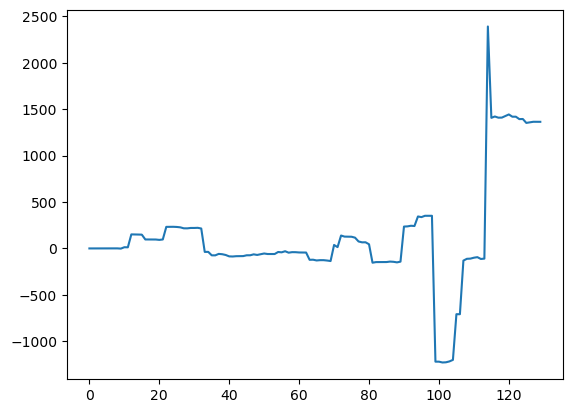

In [125]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/monthly/SP GLOBAL 100_macd_rsi.png', dpi=300)
plt.show()

## Strat-2 RSI

In [126]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [127]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

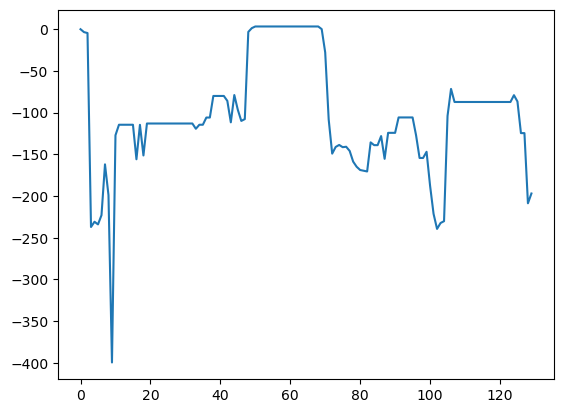

In [128]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/monthly/SP GLOBAL 100_rsi.png', dpi=300)
plt.show()